<a href="https://colab.research.google.com/github/MuhammadMuzamil514/Artificial-Intelligence-Labs/blob/main/Artificial_Intelligence_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Activity 2: Random Vacuum Agent

In [ ]:
# Step 1: Import Python's built-in 'random' library
import random

# Step 2: Define the Random Vacuum Agent
def RandomVacuumAgent():
    # Possible actions the agent can take
    actions = ['Left', 'Right', 'Suck', 'NoOp']
    # Randomly pick one action from the list
    return random.choice(actions)

# Step 3: Test the Agent
# Run the agent multiple times and display its chosen action
for i in range(5): # repeat 5 times
    print("Step", i+1, "->", RandomVacuumAgent())

Step 1 -> Suck
Step 2 -> Right
Step 3 -> NoOp
Step 4 -> Left
Step 5 -> NoOp


Activity 3: Reflex Agent (2 Tiles)

In [ ]:
# Activity 3: Reflex Agent (2 Tiles)

# Step 1: Define the Reflex Agent function
def ReflexVacuumAgent(location, status):
    # Step 2: Check the condition - if the tile is dirty
    if status == 'Dirty':
        return 'Suck'
    # Step 3: If tile is clean and agent is at location A -> move Right
    elif location == 'A':
        return 'Right'
    # Step 4: If tile is clean and agent is at location B -> move Left
    else:
        return 'Left'

# Step 5: Test the Reflex Agent
print("Test 1:", ReflexVacuumAgent('A', 'Dirty')) # Expect: Suck
print("Test 2:", ReflexVacuumAgent('A', 'Clean')) # Expect: Right
print("Test 3:", ReflexVacuumAgent('B', 'Clean')) # Expect: Left
print("Test 4:", ReflexVacuumAgent('C', 'Dirty')) # Expect: Suck

Test 1: Suck
Test 2: Right
Test 3: Left
Test 4: Suck


Activity 4: Model-based Agent

In [ ]:
# Step 1: Define the Model-based Agent function
def ModelVacuumAgent(model, location, status):

    # Step 2: Update the model with current percept
    model[location] = status
    # Step 3: If all locations are clean -> do nothing (NoOp)
    if all(state == 'Clean' for state in model.values()):
        return 'NoOp'
    # Step 4: If current tile is dirty -> clean it
    elif status == 'Dirty':
        return 'Suck'
    # Step 5: If at location A and tile is clean -> move Right
    elif location == 'A':
        return 'Right'
    # Step 6: If at location B and tile is clean -> move Left
    else:
        return 'Left'
    # Step 7: Initialize environment model (memory of locations A and B)
    model = {'A': None, 'B': None}
    # Step 8: Test the agent
model = {'A': None, 'B': None} # Initialize the model before the tests
print("Test 1:", ModelVacuumAgent(model.copy(), 'A', 'Dirty')) # Expect: Suck
print("Test 2:", ModelVacuumAgent(model.copy(), 'B', 'Dirty')) # Expect: Suck
print("Test 3:", ModelVacuumAgent(model.copy(), 'A', 'Clean')) # Expect: Right
print("Test 4:", ModelVacuumAgent(model.copy(), 'B', 'Clean')) # Expect: Left
print("Test 5:", ModelVacuumAgent({'A':'Clean','B':'Clean'}, 'A', 'Clean'))
# Expect: NoOp

Test 1: Suck
Test 2: Suck
Test 3: Right
Test 4: Left
Test 5: NoOp


5. Goal-based Agent

In [ ]:
# Step 1: Define the Goal-based Vacuum Agent
def GoalBasedVacuumAgent(room, location):
    # Step 2: Continue cleaning until no 'Dirty' tiles remain
    while 'Dirty' in room.values():
        # Step 3: If current tile is dirty -> clean it
        if room[location] == 'Dirty':
            room[location] = 'Clean'
            print(location, ": Suck")
        # Step 4: Move to the next location (toggle between A and B)
        location = 'B' if location == 'A' else 'A'
    # Step 5: When all tiles are clean, stop
    print("Goal achieved! Room is clean.")
# Step 6: Create a sample room environment
room = {'A': 'Dirty', 'B': 'Clean'}
# Step 7: Run the Goal-based Agent starting at location A
GoalBasedVacuumAgent(room, 'A')

A : Suck
Goal achieved! Room is clean.


6. Utility-based Agent

In [ ]:
# Step 1: Define the Utility-based Agent function
def UtilityBasedAgent(location, status, steps):
    # Step 2: Start with utility = 0
    utility = 0
    # Step 3: If the tile is Dirty -> Clean it and add +10 utility
    if status == 'Dirty':
        utility += 10
        # Step 4: Return action 'Suck' and net utility after subtracting steps
        return 'Suck', utility - steps
    # Step 5: If the tile is Clean -> Move and subtract step cost
    else:
        return 'Move', utility - steps

# Step 6: Test the agent
print("Test 1:", UtilityBasedAgent('A', 'Dirty', 3)) # Expect: ('Suck', 7)
print("Test 2:", UtilityBasedAgent('B', 'Clean', 2)) # Expect: ('Move', -2)

Test 1: ('Suck', 7)
Test 2: ('Move', -2)


7. Table-driven Agent

In [ ]:
# Step 1: Define the Table-driven Agent function
def TableDrivenVacuumAgent(percepts):
    # Step 2: Create a lookup table with percepts (location, status) as keys
    table = {
        (('A','Clean'),): 'Right', # If at A and Clean -> Move Right
        (('A','Dirty'),): 'Suck', # If at A and Dirty -> Suck
        (('B','Dirty'),): 'Suck' # If at B and Dirty -> Suck
    }
    # Step 3: Return the action based on percepts; default = 'NoOp'
    return table.get(percepts, 'NoOp')
# Step 4: Test the Table-driven Agent
print("Test 1:", TableDrivenVacuumAgent((('A','Dirty'),))) # Expect: Suck
print("Test 2:", TableDrivenVacuumAgent((('A','Clean'),))) # Expect: Right
print("Test 3:", TableDrivenVacuumAgent((('B','Dirty'),))) # Expect: Suck
print("Test 4:", TableDrivenVacuumAgent((('B','Clean'),))) # Expect: NoOp

Test 1: Suck
Test 2: Right
Test 3: Suck
Test 4: NoOp


Activity 8: Vacuum Environment Simulator

In [ ]:
# Step 1: Define the environment (a room with 2 tiles A and B, both Dirty
# initially)
room = {'A': 'Dirty', 'B': 'Dirty'}

# Step 2: Define a function to run the environment simulation
def run(agent):
    # Step 3: For each tile in the room (A and B)
    for loc in list(room.keys()):
        # Step 4: Ask the agent to decide an action based on location and
        # tile status
        action = agent(loc, room[loc])
        # Step 5: Print what the agent does at each location
        print(f"At {loc} -> {action}")
        # Step 6: If the action is 'Suck', update the room (tile becomes
        # Clean)
        if action == 'Suck':
            room[loc] = 'Clean'

# Step 7: Run the simulation using Reflex Agent (defined earlier in Activity
# 3)
run(ReflexVacuumAgent)

At A -> Suck
At B -> Suck


Activity 9: Compare Random vs Reflex

In [ ]:
import random
# Step 1: Define Random Agent (chooses random action)
def RandomVacuumAgent(location, status):
    actions = ['Left', 'Right', 'Suck', 'NoOp']
    return random.choice(actions)
# Step 2: Define Reflex Agent (from Activity 3)
def ReflexVacuumAgent(location, status):
    if status == 'Dirty':
        return 'Suck'
    elif location == 'A':
        return 'Right'
    else:
        return 'Left'
# Step 3: Define environment runner that returns performance score
def run(agent):
    # Initialize room with two dirty tiles
    room = {'A': 'Dirty', 'B': 'Dirty'}
    cleaned_tiles = 0
    # For each tile, ask agent for action
    for loc in list(room.keys()):
        action = agent(loc, room[loc])
        print(f"At {loc} -> {action}")
        # If action is Suck -> clean tile

        if action == 'Suck':
            room[loc] = 'Clean'
    # Step 4: Count cleaned tiles
    cleaned_tiles = sum(1 for state in room.values() if state == 'Clean')
    return cleaned_tiles
# Step 5: Run both agents
print("\n--- Random Agent ---")
random_score = run(RandomVacuumAgent)
print("\n--- Reflex Agent ---")
reflex_score = run(ReflexVacuumAgent)
# Step 6: Compare performance
print("\nPerformance Results:")
print(f"Random Agent cleaned {random_score}/2 tiles")
print(f"Reflex Agent cleaned {reflex_score}/2 tiles")


--- Random Agent ---
At A -> Suck
At B -> Left

--- Reflex Agent ---
At A -> Suck
At B -> Suck

Performance Results:
Random Agent cleaned 1/2 tiles
Reflex Agent cleaned 2/2 tiles


Activity 10: Create Comparison Table

In [ ]:
import random
# Step 1: Define Agents
# Random Agent
def RandomVacuumAgent(location, status):
    actions = ['Left', 'Right', 'Suck', 'NoOp']
    return random.choice(actions)
# Reflex Agent
def ReflexVacuumAgent(location, status):
    if status == 'Dirty':
        return 'Suck'
    elif location == 'A':
        return 'Right'
    else:
        return 'Left'
# Model-based Agent
def ModelVacuumAgent(model, location, status):
    model[location] = status
    if all(state == 'Clean' for state in model.values()):
        return 'NoOp'
    elif status == 'Dirty':
        return 'Suck'
    elif location == 'A':
        return 'Right'
    else:
        return 'Left'
# Goal-based Agent
def GoalBasedVacuumAgent(room, location):
    steps = 0
    while 'Dirty' in room.values():
        steps += 1
        if room[location] == 'Dirty':
            room[location] = 'Clean'
        location = 'B' if location == 'A' else 'A'
    return steps
# Utility-based Agent
def UtilityBasedAgent(location, status, steps):
    utility = 0
    if status == 'Dirty':
        utility += 10
        return 'Suck', utility - steps

    else:
        return 'Move', utility - steps
# Step 2: Environment Simulator for 2-tile room
def run(agent_type):
    room = {'A': 'Dirty', 'B': 'Dirty'}
    steps = 0
    cleaned = 0
    if agent_type == "Model":
        model = {'A': None, 'B': None}
    for loc in list(room.keys()):
        steps += 1
        if agent_type == "Random":
            action = RandomVacuumAgent(loc, room[loc])
        elif agent_type == "Reflex":
            action = ReflexVacuumAgent(loc, room[loc])
        elif agent_type == "Model":
            action = ModelVacuumAgent(model, loc, room[loc])
        else:
            action = None
        if action == "Suck":
            room[loc] = "Clean"
    cleaned = sum(1 for state in room.values() if state == "Clean")
    # Special case: Goal-based agent runs separately
    if agent_type == "Goal":
        room = {'A': 'Dirty', 'B': 'Dirty'}
        steps = GoalBasedVacuumAgent(room, 'A')
        cleaned = sum(1 for state in room.values() if state == "Clean")
    # Special case: Utility-based agent (just evaluate one tile)
    if agent_type == "Utility":
        action, score = UtilityBasedAgent('A', 'Dirty', 3)
        return {"Agent Type": "Utility-based", "Tiles Cleaned": "100%",
        "Steps": 4, "Rational?": "Best"}
    return {
    "Agent Type": f"{agent_type} Agent",
    "Tiles Cleaned": f"{int((cleaned/2)*100)}%",
    "Steps": steps,
    "Rational?": "Yes" if cleaned > 0 else "No"
    }
# Step 3: Collect results into a dictionary list
comparison = []
comparison.append(run("Random"))
comparison.append(run("Reflex"))
comparison.append(run("Model"))
comparison.append(run("Goal"))
comparison.append(run("Utility"))
# Step 4: Print Comparison Table
print("Agent Type\t\tTiles Cleaned\tSteps\tRational?")

print("-"*60)
for row in comparison:
    print(f"{row['Agent Type']:<16}\t{row['Tiles Cleaned']:<12}\t{row['Steps']:<5}\t{row['Rational?']}")

Agent Type		Tiles Cleaned	Steps	Rational?
------------------------------------------------------------
Random Agent    	50%         	2    	Yes
Reflex Agent    	100%        	2    	Yes
Model Agent     	100%        	2    	Yes
Goal Agent      	100%        	2    	Yes
Utility-based   	100%        	4    	Best


2. Maze Solver Agent: Implement a Goal-based agent to solve a maze.

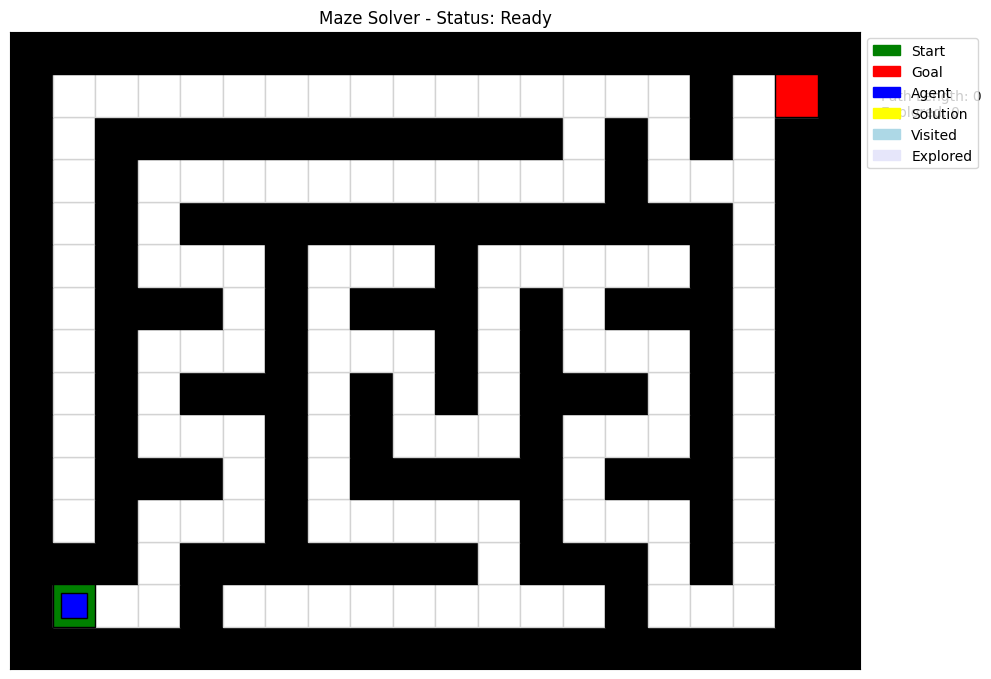

FloatSlider(value=0.3, description='Animation Speed', max=2.0, min=0.1)

<Figure size 640x480 with 0 Axes>

In [85]:
# Install required packages for Google Colab
!pip install ipywidgets matplotlib

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.widgets import Button
import ipywidgets as widgets
from IPython.display import display, clear_output
import heapq
import random
from collections import deque
import time

# Set up matplotlib for inline display
%matplotlib inline

class Maze:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.grid = [[1 for _ in range(width)] for _ in range(height)]
        self.start = (1, 1)
        self.goal = (width - 2, height - 2)
        self.generate_maze()

    def generate_maze(self):
        # Generate a maze using recursive backtracking
        stack = [(1, 1)]
        self.grid[1][1] = 0

        directions = [(0, 2), (2, 0), (0, -2), (-2, 0)]

        while stack:
            current = stack[-1]
            x, y = current

            neighbors = []
            for dx, dy in directions:
                nx, ny = x + dx, y + dy
                if 0 < nx < self.width - 1 and 0 < ny < self.height - 1 and self.grid[ny][nx] == 1:
                    neighbors.append((nx, ny, dx, dy))

            if neighbors:
                nx, ny, dx, dy = random.choice(neighbors)
                self.grid[ny][nx] = 0
                self.grid[y + dy // 2][x + dx // 2] = 0
                stack.append((nx, ny))
            else:
                stack.pop()

        # Ensure start and goal are accessible
        self.grid[self.start[1]][self.start[0]] = 0
        self.grid[self.goal[1]][self.goal[0]] = 0

    def is_valid_position(self, x, y):
        return 0 <= x < self.width and 0 <= y < self.height and self.grid[y][x] == 0

    def get_neighbors(self, x, y):
        neighbors = []
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if self.is_valid_position(nx, ny):
                neighbors.append((nx, ny))
        return neighbors

class MazeSolverAgent:
    def __init__(self, maze):
        self.maze = maze
        self.position = maze.start
        self.path = []
        self.visited = set()
        self.solution = []
        self.solving = False
        self.moving = False
        self.path_index = 0
        self.explored = set()

    def heuristic(self, a, b):
        # Manhattan distance heuristic
        return abs(a[0] - b[0]) + abs(a[1] - b[1])

    def solve(self):
        # A* search algorithm
        self.solving = True
        self.explored = set()
        frontier = []
        heapq.heappush(frontier, (0, self.position, [self.position]))

        while frontier:
            _, current, path = heapq.heappop(frontier)

            if current in self.explored:
                continue

            self.explored.add(current)

            if current == self.maze.goal:
                self.solution = path
                self.solving = False
                return True

            for neighbor in self.maze.get_neighbors(current[0], current[1]):
                if neighbor not in self.explored:
                    new_path = path + [neighbor]
                    priority = len(new_path) + self.heuristic(neighbor, self.maze.goal)
                    heapq.heappush(frontier, (priority, neighbor, new_path))

        self.solving = False
        return False

    def start_moving(self):
        if self.solution:
            self.moving = True
            self.path_index = 0
            self.position = self.solution[0]

    def move(self):
        if self.moving and self.path_index < len(self.solution) - 1:
            self.path_index += 1
            self.position = self.solution[self.path_index]
            self.visited.add(self.position)
            return True
        elif self.path_index >= len(self.solution) - 1:
            self.moving = False
            return False
        return False

    def reset(self):
        self.position = self.maze.start
        self.path = []
        self.visited = set()
        self.solution = []
        self.solving = False
        self.moving = False
        self.path_index = 0
        self.explored = set()

class MazeSolverGUI:
    def __init__(self):
        self.maze = Maze(20, 15)
        self.agent = MazeSolverAgent(self.maze)
        self.show_explored = True
        self.show_solution = True
        self.animation_speed = 0.5  # seconds between moves
        self.fig = None
        self.ax = None

    def draw_maze(self):
        # Create a new figure if it doesn't exist
        if self.fig is None:
            self.fig, self.ax = plt.subplots(figsize=(10, 8))
        else:
            self.ax.clear()

        # Draw the maze grid
        for y in range(self.maze.height):
            for x in range(self.maze.width):
                if self.maze.grid[y][x] == 1:  # Wall
                    rect = patches.Rectangle((x, y), 1, 1, linewidth=1, edgecolor='black', facecolor='black')
                    self.ax.add_patch(rect)
                else:  # Path
                    rect = patches.Rectangle((x, y), 1, 1, linewidth=1, edgecolor='lightgray', facecolor='white')
                    self.ax.add_patch(rect)

        # Draw explored cells
        if self.show_explored:
            for pos in self.agent.explored:
                if pos != self.maze.start and pos != self.maze.goal:
                    rect = patches.Rectangle((pos[0], pos[1]), 1, 1, linewidth=1, edgecolor='none', facecolor='lavender')
                    self.ax.add_patch(rect)

        # Draw solution path
        if self.show_solution and self.agent.solution:
            for i in range(len(self.agent.solution) - 1):
                start = self.agent.solution[i]
                end = self.agent.solution[i + 1]
                self.ax.plot([start[0] + 0.5, end[0] + 0.5], [start[1] + 0.5, end[1] + 0.5], 'y-', linewidth=2)

        # Draw visited cells
        for pos in self.agent.visited:
            if pos != self.maze.start and pos != self.maze.goal:
                rect = patches.Rectangle((pos[0] + 0.2, pos[1] + 0.2), 0.6, 0.6, linewidth=1, edgecolor='none', facecolor='lightblue')
                self.ax.add_patch(rect)

        # Draw start position
        start_rect = patches.Rectangle((self.maze.start[0], self.maze.start[1]), 1, 1, linewidth=1, edgecolor='black', facecolor='green')
        self.ax.add_patch(start_rect)

        # Draw goal position
        goal_rect = patches.Rectangle((self.maze.goal[0], self.maze.goal[1]), 1, 1, linewidth=1, edgecolor='black', facecolor='red')
        self.ax.add_patch(goal_rect)

        # Draw agent
        agent_rect = patches.Rectangle((self.agent.position[0] + 0.2, self.agent.position[1] + 0.2), 0.6, 0.6, linewidth=1, edgecolor='black', facecolor='blue')
        self.ax.add_patch(agent_rect)

        # Set axis limits and remove ticks
        self.ax.set_xlim(0, self.maze.width)
        self.ax.set_ylim(0, self.maze.height)
        self.ax.set_aspect('equal')
        self.ax.set_xticks([])
        self.ax.set_yticks([])

        # Add title and status
        status = "Ready"
        if self.agent.solving:
            status = "Solving..."
        elif self.agent.moving:
            status = "Moving"
        elif self.agent.solution:
            status = "Solved"

        self.ax.set_title(f"Maze Solver - Status: {status}")

        # Add legend
        legend_elements = [
            patches.Patch(color='green', label='Start'),
            patches.Patch(color='red', label='Goal'),
            patches.Patch(color='blue', label='Agent'),
            patches.Patch(color='yellow', label='Solution'),
            patches.Patch(color='lightblue', label='Visited'),
            patches.Patch(color='lavender', label='Explored')
        ]
        self.ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

        # Add path length and explored count
        info_text = f"Path Length: {len(self.agent.solution) if self.agent.solution else 0}\n"
        info_text += f"Explored: {len(self.agent.explored)}"
        self.ax.text(self.maze.width + 0.5, self.maze.height - 2, info_text, fontsize=10)

        plt.tight_layout()
        display(self.fig)

    def solve_maze(self, b):
        if not self.agent.solving and not self.agent.moving:
            clear_output(wait=True)
            self.agent.solve()
            self.draw_maze()
            self.create_controls()

    def move_agent(self, b):
        if self.agent.solution and not self.agent.moving:
            clear_output(wait=True)
            self.agent.start_moving()

            # Animate the agent movement
            while self.agent.move():
                clear_output(wait=True)
                self.draw_maze()
                self.create_controls()
                time.sleep(self.animation_speed)

            clear_output(wait=True)
            self.draw_maze()
            self.create_controls()

    def reset_agent(self, b):
        clear_output(wait=True)
        self.agent.reset()
        self.draw_maze()
        self.create_controls()

    def new_maze(self, b):
        clear_output(wait=True)
        self.maze = Maze(20, 15)
        self.agent = MazeSolverAgent(self.maze)
        self.draw_maze()
        self.create_controls()

    def toggle_explored(self, change):
        self.show_explored = change['new']
        clear_output(wait=True)
        self.draw_maze()
        self.create_controls()

    def toggle_solution(self, change):
        self.show_solution = change['new']
        clear_output(wait=True)
        self.draw_maze()
        self.create_controls()

    def create_controls(self):
        # Create buttons
        solve_button = widgets.Button(description="Solve Maze")
        move_button = widgets.Button(description="Move Agent")
        reset_button = widgets.Button(description="Reset")
        new_maze_button = widgets.Button(description="New Maze")

        # Create checkboxes
        explored_checkbox = widgets.Checkbox(value=self.show_explored, description="Show Explored")
        solution_checkbox = widgets.Checkbox(value=self.show_solution, description="Show Solution")

        # Create speed slider
        speed_slider = widgets.FloatSlider(value=self.animation_speed, min=0.1, max=2.0, step=0.1, description="Animation Speed")

        def update_speed(change):
            self.animation_speed = change['new']

        speed_slider.observe(update_speed, names='value')

        # Register button callbacks
        solve_button.on_click(self.solve_maze)
        move_button.on_click(self.move_agent)
        reset_button.on_click(self.reset_agent)
        new_maze_button.on_click(self.new_maze)

        # Register checkbox callbacks
        explored_checkbox.observe(self.toggle_explored, names='value')
        solution_checkbox.observe(self.toggle_solution, names='value')

        # Display controls
        controls = widgets.HBox([solve_button, move_button, reset_button, new_maze_button])
        options = widgets.HBox([explored_checkbox, solution_checkbox])

        display(controls)
        display(options)
        display(speed_slider)

    def run(self):
        self.draw_maze()
        self.create_controls()

# Create and run the maze solver GUI
maze_solver = MazeSolverGUI()
maze_solver.run()